In [53]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [54]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
df = pd.read_csv('../data/고객db_전처리.csv')

In [56]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,주소,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,인천광역시 남동구 구월동 88-10,...,2분기,평일,350,22,35170000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,광주광역시 서구 치평동 14-7,...,1분기,평일,38,42,85790000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,부산광역시 해운대구 우동 101-12,...,1분기,평일,10,26,69500000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,전라남도 목포시 부주동 77-8,...,2분기,평일,689,63,34920000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,경기도 수원시 영통구 원천동 12-34,...,4분기,주말,536,53,50230000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,전라북도 전주시 완산구 덕진동 33-7,...,4분기,평일,90,66,86770000,신용카드,온라인,2,0.011,0.280
287,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,충청남도 천안시 동남구 성성동 22-3,...,3분기,평일,574,47,69510000,현금,오프라인,3,0.047,0.116
288,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,경상남도 창원시 의창구 봉곡동 48-6,...,1분기,평일,433,56,39890000,계좌이체,온라인,2,0.005,0.304
289,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,대구광역시 수성구 범어동 55-3,...,1분기,평일,415,40,44530000,현금,온라인,2,0.006,0.268


In [57]:
# 필요 컬럼만 추출
df[['선호 거래 방식', '선호 구매 경로']]

,선호 거래 방식,선호 구매 경로
0,신용카드,오프라인
1,신용카드,오프라인
2,계좌이체,오프라인
3,현금,오프라인
4,신용카드,오프라인
...,...,...
286,신용카드,온라인
287,현금,오프라인
288,계좌이체,온라인
289,현금,온라인


In [58]:
result = df[['선호 거래 방식', '선호 구매 경로']]

In [59]:
df.groupby(['선호 거래 방식'])['선호 구매 경로']

In [60]:
# groupby 하고 count() 한 뒤 reset_index() 하여 데이터프레임으로 변환환
result1 = df['선호 거래 방식'].value_counts().reset_index()

In [61]:
result2 = df['선호 구매 경로'].value_counts().reset_index()

In [62]:
result1

,선호 거래 방식,count
0,신용카드,114
1,현금,94
2,계좌이체,83


In [63]:
result2

,선호 구매 경로,count
0,오프라인,157
1,온라인,134


In [64]:
# count 컬럼명을 '거래 수', '구매 수' 컬럼 명으로 각 각 변경
result1 = result1.rename(columns={'count' : '거래 수'})

In [65]:
result1

,선호 거래 방식,거래 수
0,신용카드,114
1,현금,94
2,계좌이체,83


In [66]:
result2 = result2.rename(columns={'count' : '구매 수'})

In [67]:
result2

,선호 구매 경로,구매 수
0,오프라인,157
1,온라인,134


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

# 한글 폰트 설정 (운영체제에 맞는 폰트를 설정)
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
# matplotlib.rcParams['font.family'] = 'NanumGothic'  # Linux 사용자
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [95]:
# 거래방식과 구매경로 시각화 하기
# 1. 거래 방식 시각화

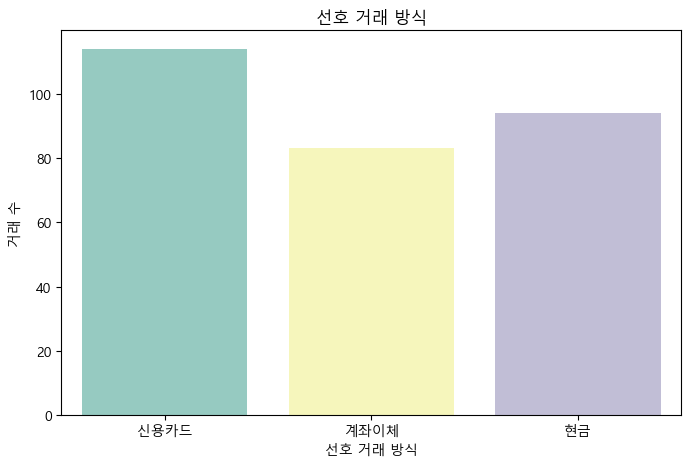

In [132]:
plt.figure(figsize=(8, 5))
sb.countplot(data=df, x='선호 거래 방식', hue= '선호 거래 방식', palette='Set3', legend=False)
plt.title('선호 거래 방식')
plt.ylabel('거래 수')
plt.show()

In [97]:
# 2. 구매 경로 시각화

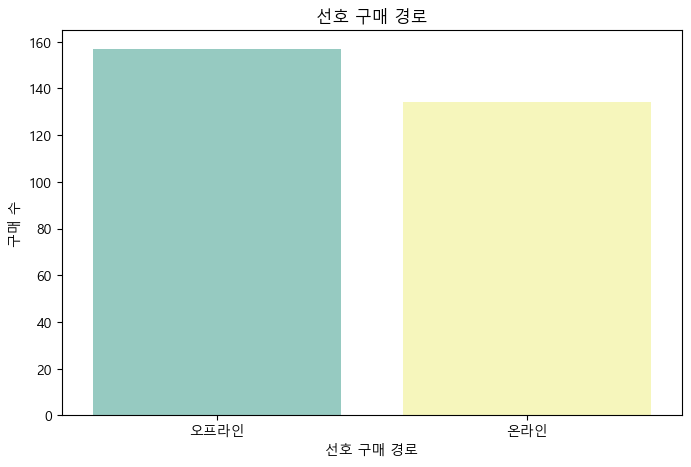

In [133]:
plt.figure(figsize=(8, 5))
sb.countplot(data=df, x='선호 구매 경로', hue='선호 구매 경로', palette='Set3', legend=False)
plt.title('선호 구매 경로')
plt.ylabel('구매 수')
plt.show()

In [99]:
import matplotlib.pyplot as plt
import seaborn as sb

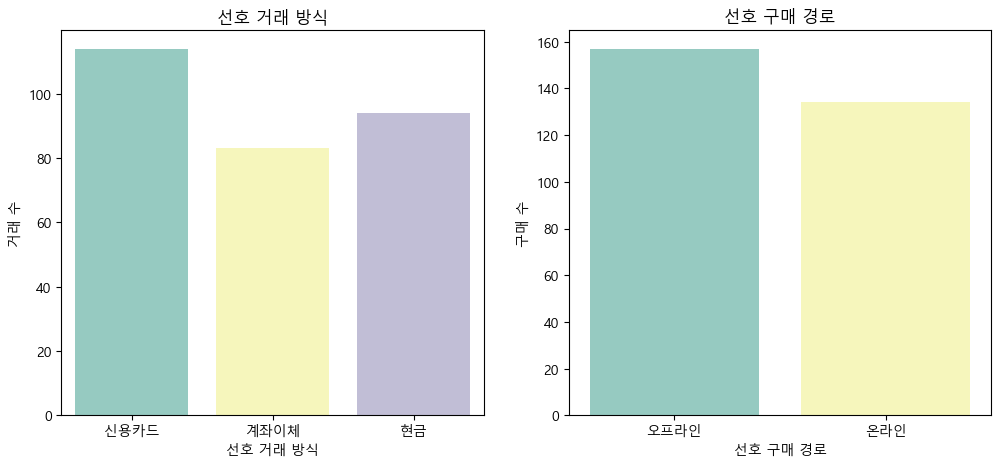

In [134]:
# 시각화한두 개의 그래프를 한 화면에 같이 출력하기
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.countplot(data=df, x='선호 거래 방식', hue= '선호 거래 방식', palette='Set3', legend=False)
plt.title('선호 거래 방식')
plt.ylabel('거래 수')
plt.subplot(1, 2, 2)
sb.countplot(data=df, x='선호 구매 경로', hue= '선호 구매 경로', palette='Set3', legend=False)
plt.title('선호 구매 경로')
plt.ylabel('구매 수')
plt.show()